In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from Corras.Scenario.aslib_ranking_scenario import ASRankingScenario
from itertools import product

# measures
from scipy.stats import kendalltau, describe
from sklearn.metrics import mean_absolute_error, mean_squared_error
from Corras.Evaluation.evaluation import ndcg_at_k, compute_relevance_scores_unit_interval

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [4]:
scenario_path = "./aslib_data-aslib-v4.0/"
evaluations_path = "./evaluations-nnh-config/"

figures_path = "./figures/progression-plots/"
scenarios = ["MIP-2016"]
lambda_values = [0.0, 0.5, 1.0]
epsilon_values = [1.0]
max_pairs_per_instance = 5
maxiter = 1000
seeds = [15]

learning_rates = [0.001]
batch_sizes = [128]
es_patiences = [64]
es_intervals = [8]
es_val_ratios = [0.3]
layer_sizes = [[16,16], [16,16,16], [16,16,16,16]]
activation_functions = ["relu", "tanh", "sigmoid"]

splits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

params = [scenarios, learning_rates, seeds,
          batch_sizes, es_patiences, es_intervals, es_val_ratios]

param_product = list(product(*params))

Scenario MIP-2016 not found in corras evaluation data!
   Unnamed: 0  split  seed problem_instance  lambda  epsilon  learning_rate  \
0           0      1    15           a1c1s1     0.0      1.0          0.001   
1           1      1    15            air04     0.0      1.0          0.001   
2           2      1    15  ash608gpia-3col     0.0      1.0          0.001   
3           3      1    15          danoint     0.0      1.0          0.001   
4           4      1    15           glass4     0.0      1.0          0.001   

   es_interval  es_patience  es_val_ratio  ...  activation_function  tau_corr  \
0            8           64           0.3  ...                 relu  0.737865   
1            8           64           0.3  ...                 relu  1.000000   
2            8           64           0.3  ...                 relu  0.800000   
3            8           64           0.3  ...                 relu  0.800000   
4            8           64           0.3  ...                 re

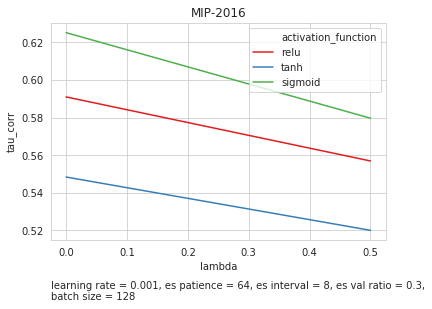

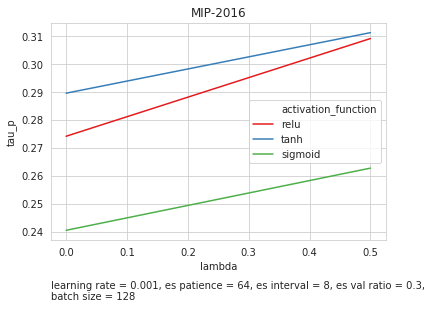

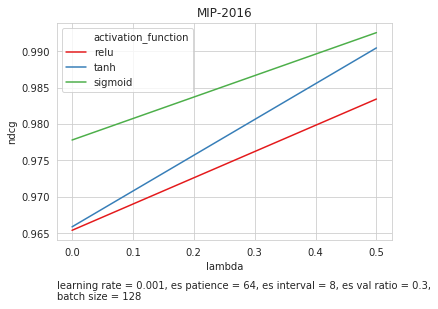

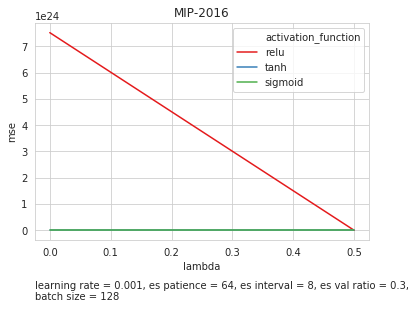

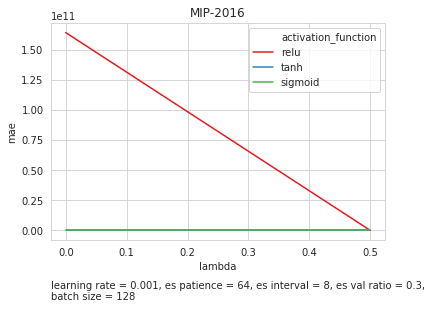

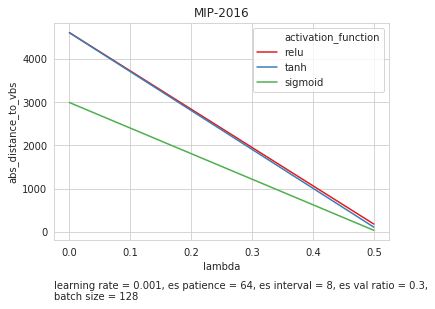

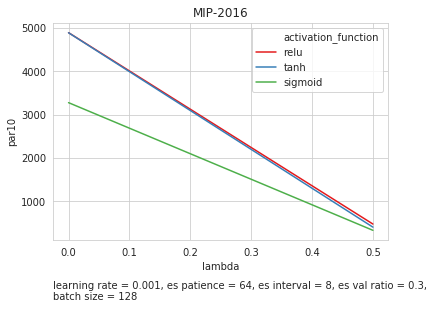

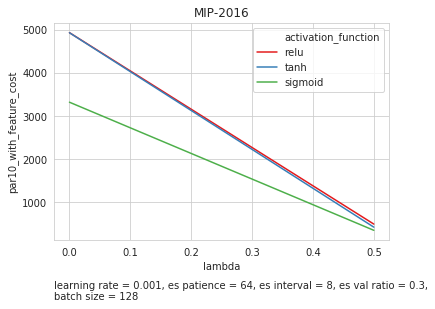

DataError: No numeric types to aggregate

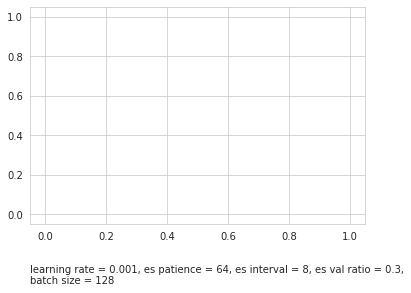

In [9]:
for scenario_name, learning_rate, seed, batch_size, es_patience, es_interval, es_val_ratio in param_product:
    df_baseline_lr = None
    df_baseline_rf = None
    params_string = "-".join([scenario_name,
                              str(learning_rate), str(batch_size), str(es_patience), str(es_interval), str(es_val_ratio)])
    try:
        df_baseline_lr = pd.read_csv(
            evaluations_path + "baseline-evaluation-linear-regression" + scenario_name + ".csv")
        df_baseline_rf = pd.read_csv(
            evaluations_path + "baseline-evaluation-random_forest" + scenario_name + ".csv")
    except:
        print("Scenario " + scenario_name +
              " not found in corras evaluation data!")

        # continue
    try:
        # df_corras = pd.read_csv(evaluations_path + "corras-linhinge-evaluation-" + scenario_name + ".csv")
        corras = pd.read_csv(
            evaluations_path + "corras-hinge-nn-" + scenario_name + "-short.csv")
    except:
        print("Scenario " + scenario_name +
              " not found in corras evaluation data!")
        continue
    current_frame = corras.loc[(corras["seed"] == seed) & (
    corras["learning_rate"] == learning_rate) & (
    corras["batch_size"] == batch_size) & (corras["es_patience"] == es_patience) & (corras["es_interval"] == es_interval) & (corras["es_val_ratio"] == es_val_ratio)
                               & (corras["es_val_ratio"] == es_val_ratio) & (corras["layer_sizes"] == "[16, 16]")]

    print(current_frame.head())
    for measure in current_frame.columns[13:]:
        plt.clf()
        # bp = sns.boxplot(x="lambda", y=measure, hue="epsilon", data=df_corras)
        # bp = sns.boxplot(x="lambda", y=measure, data=df_corras)
        # if df_baseline is not None:
        #     bp.axes.axhline(df_baseline[measure].mean(), c="g", ls="--", label="rf-baseline-mean")
        # plt.title(scenario_name)
        # plt.legend()
        # plt.savefig(figures_path+scenario_name+"-" + measure +"-boxplot.pdf")

    for measure in current_frame.columns[13:]:
        plt.clf()
        # bp = sns.lineplot(x="lambda", y=measure, hue="epsilon", data=df_corras, palette=sns.color_palette("Set1", len(pd.unique(df_corras["epsilon"]))))
        # g = sns.FacetGrid(df_corras, col="max_inverse_transform")
        # g.map(sns.lineplot, "lambda", measure)
        text = "learning rate = " + str(learning_rate) + ", "
        text += "es patience = " + str(es_patience) + ", "
        text += "es interval = " + \
        str(es_interval) + ", "
        text += "es val ratio = " + str(es_val_ratio) + ",\n"
        text += "batch size = " + str(batch_size)
        
        plt.annotate(text, (0, 0), (0, -40), xycoords="axes fraction",
             textcoords="offset points", va="top")

        lp = sns.lineplot(x="lambda", y=measure, hue="activation_function", ci=None, data=current_frame, palette=sns.color_palette("Set1", len(pd.unique(current_frame["activation_function"]))))
        if df_baseline_rf is not None:
            lp.axes.axhline(df_baseline_rf[measure].mean(
            ), c="g", ls="--", label="rf-baseline-mean")
        if df_baseline_lr is not None:    
            lp.axes.axhline(df_baseline_lr[measure].mean(
            ), c="m", ls="--", label="lr-baseline-mean")
        plt.title(scenario_name)
        plt.legend()
        plt.savefig(figures_path + scenario_name + "-nn-hinge-act-" + params_string.replace(".","_") + "-" + measure + "-lineplot-eps.pdf", bbox_inches="tight")
        plt.show()

In [20]:
corras[["epsilon"]]

,epsilon
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
105395,1.0
105396,1.0
105397,1.0
105398,1.0
